# Environment

In [1]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_exo"

ENRICHMENT_FILE = f"{BASE_DIR}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

OUTPUT_LISTS_PATH = f"{BASE_DIR}/lists"
print(OUTPUT_LISTS_PATH)
os.makedirs(OUTPUT_LISTS_PATH, exist_ok=True)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_exo/cpg_enrichment_parallel.csv
/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_exo/lists


# Load Data

In [2]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [3]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (15273, 24)

First few rows:


,chr,start,end,neu_signal,nsc_signal,fold_change,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
0,chr1,3670619,3671074,44.531091,13.042663,3.414264,0.100000,both,both,False,3,3,"43.611977159783706,52.05083147360805,37.93046437749823","8.58457662022296,18.074157164901866,12.46925556753564",2159,455,CpG:,613,3,1,6.08946;8.05807;5.49517,6.06037,3670396,3672555
1,chr1,3671654,3672156,44.531091,13.042663,3.414264,0.100000,both,both,False,3,3,"43.611977159783706,52.05083147360805,37.93046437749823","8.58457662022296,18.074157164901866,12.46925556753564",2159,502,CpG:,613,3,2,6.08946;8.05807;5.49517,5.54931;6.06037,3670396,3672555
2,chr1,4491701,4493673,3.420399,28.438007,0.120276,0.333333,both,nsc_only,False,2,2,"2.429280403817054,0.0,7.831916790197392","44.398371658702885,0.0,40.91564872477314",404,1972,CpG:,619,0,2,NaN,6.0982;5.8282,4492305,4492709
3,chr1,4496947,4497608,10.043227,4.446822,2.258518,1.000000,both,neu_only,False,2,1,"24.89710185653509,0.0,5.232580183232011","0.0,0.0,13.340464833168392",1119,661,CpG:,619,1,0,3.0083,NaN,4496514,4497633
4,chr1,4571641,4572075,18.511282,25.026296,0.739673,0.700000,both,both,False,3,3,"13.692992781864778,18.217554917468977,23.623298807605227","31.500924768035347,13.556918122386204,30.021045078151403",786,434,CpG:,619,3,3,3.91321;3.39512;3.76449,4.35039;6.82732;3.40697,4571438,4572224



Column names:
['chr', 'start', 'end', 'neu_signal', 'nsc_signal', 'fold_change', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'neu_replicates_with_signal', 'nsc_replicates_with_signal', 'neu_replicate_signals', 'nsc_replicate_signals', 'region_length', 'cpg_length', 'cpg_score', 'cpg_name', 'neu_replicates_with_peaks', 'nsc_replicates_with_peaks', 'neu_peak_scores_by_rep', 'nsc_peak_scores_by_rep', 'region_start', 'region_end']


In [4]:
cpg_enrichment_df = cpg_enrichment_df.rename(columns={'fold_change': 'enrichment'})

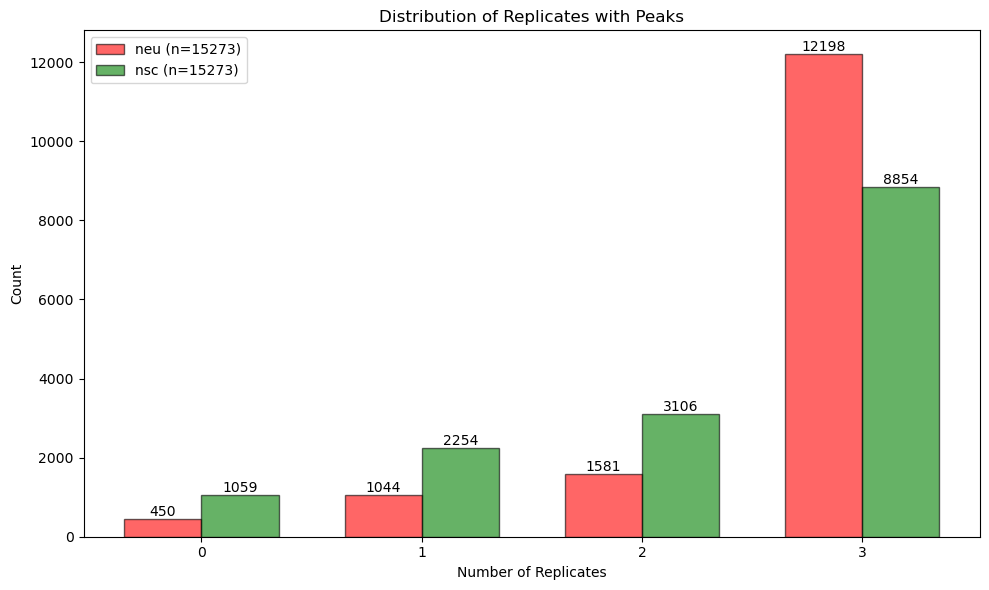

In [5]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
neu_counts = [len(cpg_enrichment_df[cpg_enrichment_df['neu_replicates_with_peaks'] == i]) for i in range(4)]
nsc_counts = [len(cpg_enrichment_df[cpg_enrichment_df['nsc_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, neu_counts, width, label=f'neu (n={sum(neu_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, nsc_counts, width, label=f'nsc (n={sum(nsc_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, neu_counts[i], str(neu_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, nsc_counts[i], str(nsc_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [7]:
# Split data based on binding type
neu_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'neu_only']
nsc_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'nsc_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by neu only: {len(neu_only_df_by_signal)}")
print(f"Number of CpG islands bound by nsc only: {len(nsc_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by neu only: 89
Number of CpG islands bound by nsc only: 25
Number of CpG islands bound by both: 15159


## By peaks number

Minimum 1 replicates with peaks

In [8]:
# Split data based on binding type
neu_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'neu_only']
nsc_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'nsc_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by neu only: {len(neu_only_df_by_peaks)}")
print(f"Number of CpG islands bound by nsc only: {len(nsc_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by neu only: 1059
Number of CpG islands bound by nsc only: 450
Number of CpG islands bound by both: 13764


# Data analysis

## Both: enrichment distribution

In [9]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    15159.000000
mean         3.249883
std         48.570489
min          0.004369
25%          1.182719
50%          1.759512
75%          2.582856
max       5579.497140
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    1.376400e+04
mean              inf
std               NaN
min      1.719413e-01
25%      1.193877e+00
50%      1.739538e+00
75%      2.506820e+00
max               inf
Name: enrichment, dtype: float64


/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


== fold change (Neuron/NSC) ==

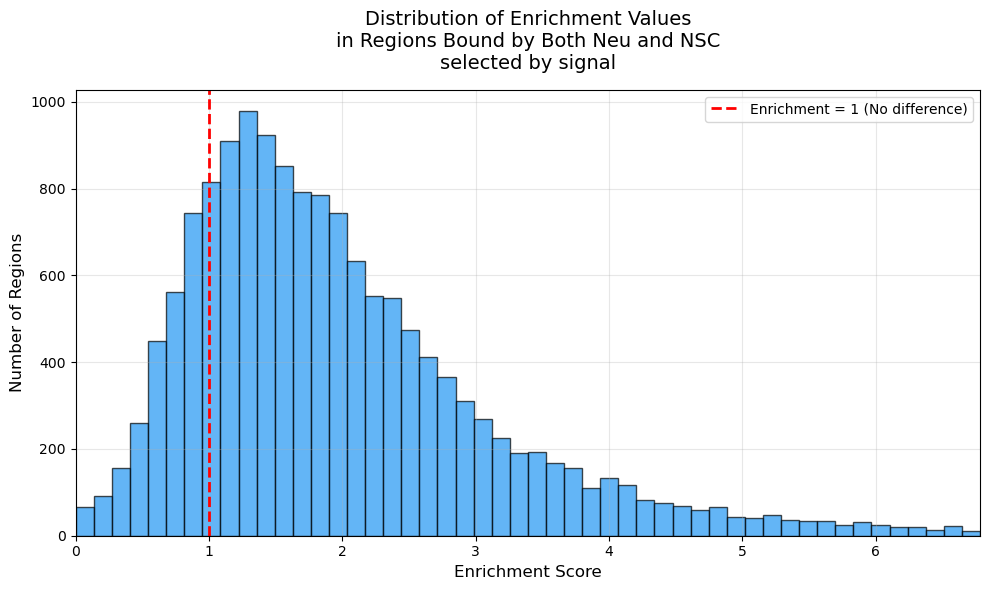

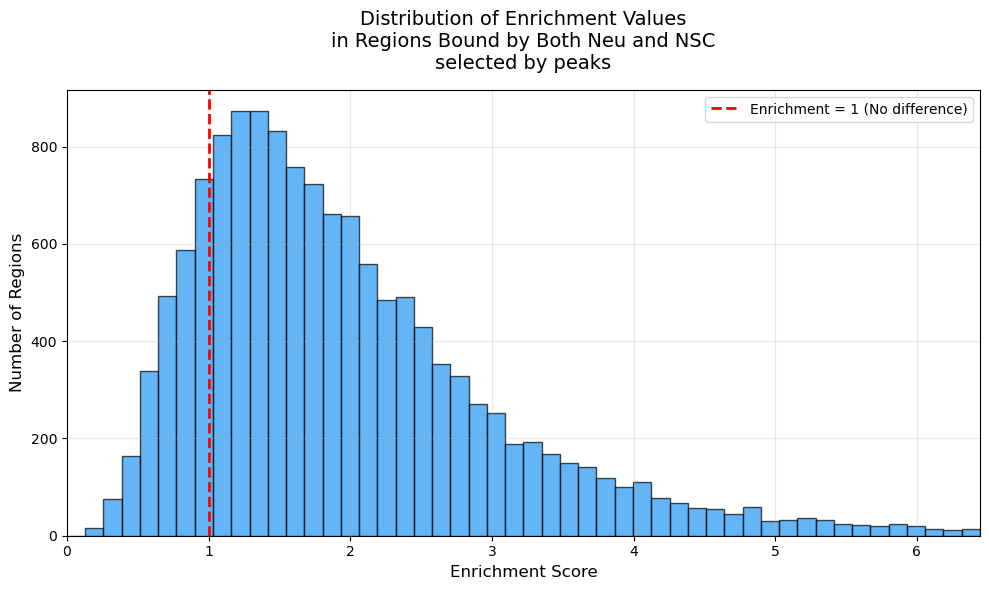

In [10]:
range_min_signal, range_max_signal = plot_enrichment_distribution_neu_vs_nsc(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution_neu_vs_nsc(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [11]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 6.7832650648430315): 407

Number of outliers selected by peaks(enrichment > 6.4456492106522685): 181


In [12]:
outliers_df_signal.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
15123,chrX,103447736,103447985,45.219351,0.008105,5579.497140,0.5,both,neu_only,False,3,1,"14.346791822849074,84.09554596152697,37.21571394186328","0.0,0.024313669907918327,0.0",1207,249,CpG:,1374,3,0,3.84911;9.66901;5.49263,NaN,103446763,103447970
3323,chr12,108352800,108353060,12.112435,0.008893,1362.032934,0.5,both,neu_only,False,3,1,"28.921709420464257,1.8495235248045487,5.566071718389337","0.0,0.026678726889870382,0.0",440,260,CpG:,1411,1,0,3.05894,NaN,108352632,108353072
11124,chr5,139546513,139547812,31.274839,0.038509,812.135438,1.0,both,neu_only,False,1,1,"0.0,93.82451686639895,0.0","0.0,0.0,0.11552816492387619",174,1299,CpG:,1649,1,0,5.05589,NaN,139547227,139547401
5678,chr17,23557751,23558165,54.980859,0.073768,745.316788,0.5,both,neu_only,False,3,1,"45.517528428943876,83.63030956163318,35.794738717035415","0.0,0.0,0.2213053287716087",545,414,CpG:,764,2,0,5.78604;7.06472,NaN,23557542,23558087
4970,chr15,91199432,91199666,22.074322,0.041235,535.334086,0.5,both,neu_only,False,3,1,"16.074071244133844,15.930702544318304,34.21819123162164","0.0,0.0,0.12370399475097656",225,234,CpG:,1280,1,0,2.91963,NaN,91199614,91199839


In [13]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chrX:103,447,736-103,447,985                      enrichment: 5579.497140497866
chr12:108,352,800-108,353,060                     enrichment: 1362.0329340923315
chr5:139,546,513-139,547,812                      enrichment: 812.1354383861443
chr17:23,557,751-23,558,165                       enrichment: 745.3167875493695
chr15:91,199,432-91,199,666                       enrichment: 535.3340864487402

Middle 5 outliers selected by signal:
chr2:164,167,817-164,168,844                      enrichment: 11.683906537943212
chr8:108,175,167-108,175,431                      enrichment: 11.671232886885129
chr17:68,836,838-68,837,476                       enrichment: 11.586318571879596
chr2:165,796,193-165,796,571                      enrichment: 11.538890331540395
chr6:52,259,986-52,261,198                        enrichment: 11.47397198349965

Last 5 outliers selected by signal:
chr13:56,887,628-56,887,879                       enrichment: 6.798019918046432
c

In [14]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chrX:103,447,736-103,447,985                      enrichment: 5579.497140497866
chr12:108,352,800-108,353,060                     enrichment: 1362.0329340923315
chr5:139,546,513-139,547,812                      enrichment: 812.1354383861443
chr17:23,557,751-23,558,165                       enrichment: 745.3167875493695
chr15:91,199,432-91,199,666                       enrichment: 535.3340864487402

Middle 5 outliers selected by signal:
chr2:164,167,817-164,168,844                      enrichment: 11.683906537943212
chr8:108,175,167-108,175,431                      enrichment: 11.671232886885129
chr17:68,836,838-68,837,476                       enrichment: 11.586318571879596
chr2:165,796,193-165,796,571                      enrichment: 11.538890331540395
chr6:52,259,986-52,261,198                        enrichment: 11.47397198349965

Last 5 outliers selected by signal:
chr13:56,887,628-56,887,879                       enrichment: 6.798019918046432
c

In [15]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr11:96,124,323-96,124,578                       enrichment: inf
chr18:37,767,918-37,768,507                       enrichment: inf
chr12:100,898,889-100,899,508                     enrichment: 113.0554682390806
chr12:72,303,786-72,304,071                       enrichment: 66.7503552561876
chr5:120,631,230-120,631,441                      enrichment: 47.22973224744927

Middle 5 outliers selected by peaks:
chr5:123,057,852-123,058,245                      enrichment: 8.183436708605633
chr11:20,020,717-20,021,262                       enrichment: 8.152136863317617
chr12:98,628,037-98,628,349                       enrichment: 8.035705579261137
chr13:117,220,564-117,221,184                     enrichment: 8.02871714157617
chr7:142,532,885-142,533,325                      enrichment: 7.979163562355865

Last 5 outliers selected by peaks:
chr17:35,164,491-35,165,403                       enrichment: 6.520339738500939
chr11:69,981,202-69,981,639            

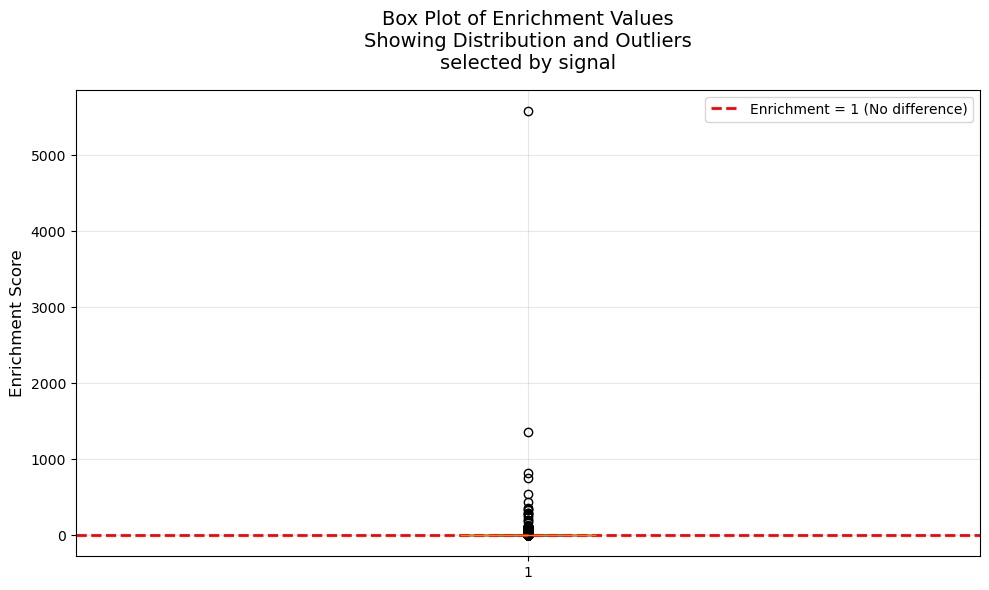

In [16]:
# plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [17]:
outliers_df_signal["nsc_replicates_with_peaks"].value_counts()

signal_nsc_zero_peaks  = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 0]
signal_nsc_one_peaks   = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 1]
signal_nsc_two_peaks   = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 2]
signal_nsc_three_peaks = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 3]

outliers_df_peaks["nsc_replicates_with_peaks"].value_counts()

peaks_nsc_zero_peaks  = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 0]
peaks_nsc_one_peaks   = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 1]
peaks_nsc_two_peaks   = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 2]
peaks_nsc_three_peaks = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 3]

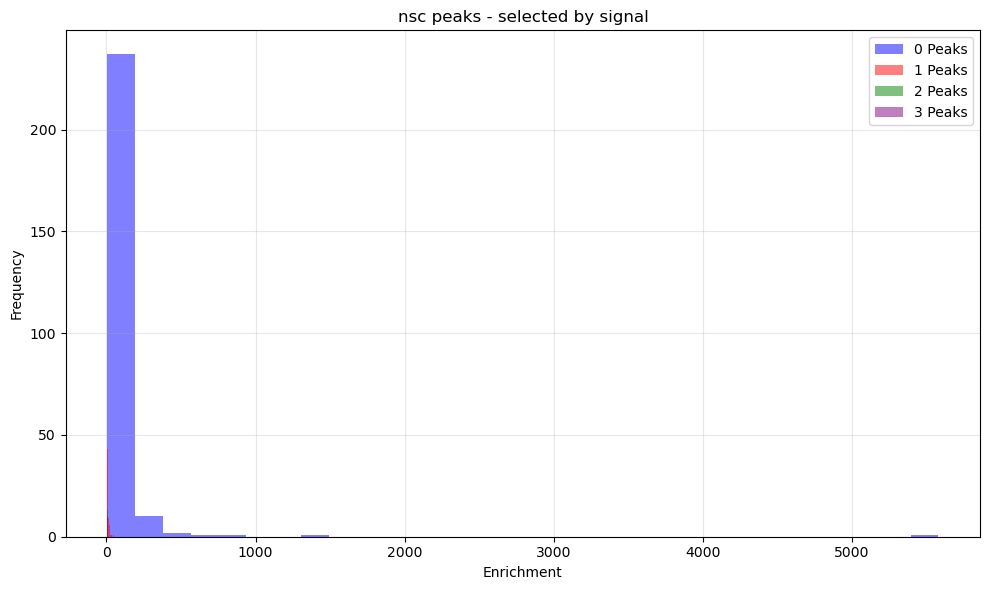

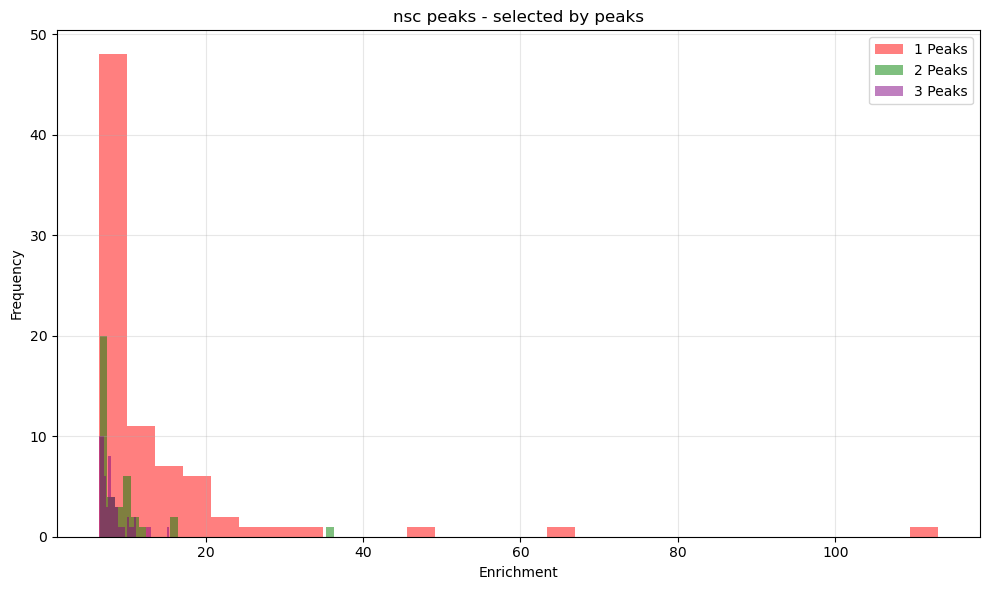

In [18]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='nsc_replicates_with_peaks', title="nsc peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='nsc_replicates_with_peaks', title="nsc peaks - selected by peaks")

In [19]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr10:79,959,868-79,960,557                       enrichment: 36.27775584583844
chr11:11,461,979-11,462,326                       enrichment: 16.267529386994056
chr5:143,112,265-143,113,080                      enrichment: 16.06816573360601
chr4:46,389,088-46,389,594                        enrichment: 12.127122320654
chr16:37,384,329-37,385,060                       enrichment: 11.19735545216544

Middle 5 outliers selected by peaks:
chr7:142,532,885-142,533,325                      enrichment: 7.979163562355865
chr10:79,766,462-79,767,766                       enrichment: 7.758933912587697
chr5:125,433,816-125,434,258                      enrichment: 7.374532614608529
chr1:159,231,781-159,232,536                      enrichment: 7.347045866794669
chr9:7,836,877-7,837,494                          enrichment: 7.255071810774878

Last 5 outliers selected by peaks:
chr5:37,163,077-37,163,496                        enrichment: 6.644866174823577
chr17:33,8

In [20]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr10:79,959,868-79,960,557                       enrichment: 36.27775584583844
chr11:11,461,979-11,462,326                       enrichment: 16.267529386994056
chr5:143,112,265-143,113,080                      enrichment: 16.06816573360601
chr4:46,389,088-46,389,594                        enrichment: 12.127122320654
chr16:37,384,329-37,385,060                       enrichment: 11.19735545216544

Middle 5 outliers selected by signal:
chr10:78,412,629-78,413,121                       enrichment: 9.148940484055982
chrX:106,011,556-106,012,093                      enrichment: 9.031867708599098
chr7:144,553,371-144,554,022                      enrichment: 8.486494701031603
chr12:98,628,037-98,628,349                       enrichment: 8.035705579261137
chr7:142,532,885-142,533,325                      enrichment: 7.979163562355865

Last 5 outliers selected by signal:
chr14:63,606,145-63,606,376                       enrichment: 6.950861919134885
chr5:11

## Regions length distribution

### Region length - defined by the outermost peaks coordinates

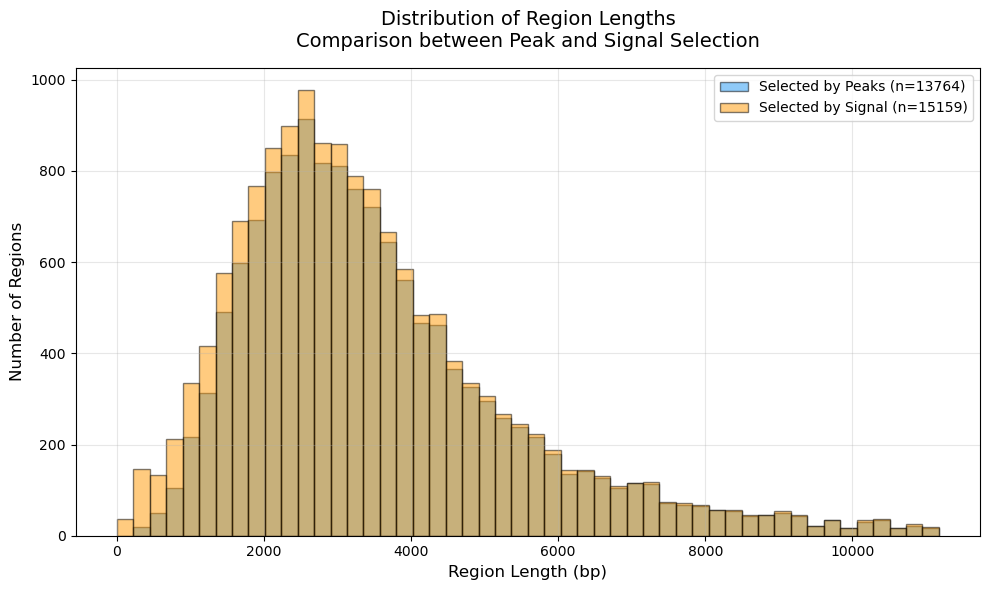

In [21]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='region_length')

In [22]:
both_df_sorted_by_region_length_signal = both_df_by_signal.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_signal.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
10126,chr4,148951660,148952711,28.850291,9.186878,3.140380,0.1,both,both,False,3,3,"31.444062274246793,29.582429402940488,25.52438127728439","8.980579140712468,7.6352371813937525,10.944817932426123",34979,1051,CpG:,1721,3,2,4.57641;11.3859;6.00517,6.8287;5.38629,148919192,148954171
10125,chr4,148938649,148938905,28.850291,9.186878,3.140380,0.1,both,both,False,3,3,"31.444062274246793,29.582429402940488,25.52438127728439","8.980579140712468,7.6352371813937525,10.944817932426123",34979,256,CpG:,1721,3,1,4.57641;3.65557;5.1156,2.58773,148919192,148954171
7290,chr19,59467141,59467557,41.632720,14.797893,2.813422,0.1,both,neu_only,False,3,3,"42.351129533752356,43.392525259849556,39.154506400136775","14.829227887920277,14.758921251135327,14.805530905124069",23045,416,CpG:,1038,3,0,5.93023;12.3771;6.60721,NaN,59450888,59473933
7291,chr19,59469037,59469305,41.632720,14.797893,2.813422,0.1,both,neu_only,False,3,3,"42.351129533752356,43.392525259849556,39.154506400136775","14.829227887920277,14.758921251135327,14.805530905124069",23045,268,CpG:,1038,3,0,5.93023;12.3771;6.60721,NaN,59450888,59473933
8450,chr2,167777455,167777726,79.994576,20.618723,3.879706,0.1,both,both,False,3,3,"71.8351678906179,109.61424505702277,58.5343156873228","19.621144043651906,19.076032322838408,23.15899270027954",21038,271,CpG:,1865,3,3,10.3069;21.2532;8.05397,7.3405;6.01769;8.33665,167759249,167780287


In [23]:
both_df_sorted_by_region_length_peaks = both_df_by_peaks.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
10125,chr4,148938649,148938905,28.850291,9.186878,3.140380,0.1,both,both,False,3,3,"31.444062274246793,29.582429402940488,25.52438127728439","8.980579140712468,7.6352371813937525,10.944817932426123",34979,256,CpG:,1721,3,1,4.57641;3.65557;5.1156,2.58773,148919192,148954171
10126,chr4,148951660,148952711,28.850291,9.186878,3.140380,0.1,both,both,False,3,3,"31.444062274246793,29.582429402940488,25.52438127728439","8.980579140712468,7.6352371813937525,10.944817932426123",34979,1051,CpG:,1721,3,2,4.57641;11.3859;6.00517,6.8287;5.38629,148919192,148954171
8450,chr2,167777455,167777726,79.994576,20.618723,3.879706,0.1,both,both,False,3,3,"71.8351678906179,109.61424505702277,58.5343156873228","19.621144043651906,19.076032322838408,23.15899270027954",21038,271,CpG:,1865,3,3,10.3069;21.2532;8.05397,7.3405;6.01769;8.33665,167759249,167780287
7288,chr19,59451480,59451824,44.975806,16.562136,2.715580,0.1,both,both,False,3,3,"45.20665201607052,47.32772054462123,42.393046196893664","16.726131519218946,16.724478795523627,16.235798712679543",19961,344,CpG:,1038,3,1,7.05486;11.0538;6.60721,10.7108,59450579,59470540
7289,chr19,59457915,59459984,44.975806,16.562136,2.715580,0.1,both,both,False,3,3,"45.20665201607052,47.32772054462123,42.393046196893664","16.726131519218946,16.724478795523627,16.235798712679543",19961,2069,CpG:,1038,3,3,7.05486;17.2207;6.60721,"6.60707;5.37484,7.43635;10.4273",59450579,59470540


In [24]:
print_outlier_groups(both_df_sorted_by_region_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr4:148,938,649-148,938,905                      enrichment: 3.140380303121594
chr4:148,951,660-148,952,711                      enrichment: 3.140380303121594
chr2:167,777,455-167,777,726                      enrichment: 3.879705650311388
chr19:59,451,480-59,451,824                       enrichment: 2.715580002634493
chr19:59,457,915-59,459,984                       enrichment: 2.715580002634493

Middle 5 outliers selected by peaks:
chr13:56,134,753-56,135,783                       enrichment: 1.3679174784476855
chr11:102,761,370-102,761,910                     enrichment: 1.049367086624066
chr4:107,066,512-107,067,447                      enrichment: 1.4999371692942731
chr9:107,568,998-107,569,591                      enrichment: 0.7340508245957471
chr7:144,175,464-144,175,899                      enrichment: 4.869016660753506

Last 5 outliers selected by peaks:
chr10:120,414,651-120,414,898                     enrichment: 1.8054348929581367
chr15

In [25]:
print_outlier_groups(both_df_sorted_by_region_length_signal, "signal")


First 5 outliers selected by signal:
chr4:148,951,660-148,952,711                      enrichment: 3.140380303121594
chr4:148,938,649-148,938,905                      enrichment: 3.140380303121594
chr19:59,467,141-59,467,557                       enrichment: 2.8134221148019853
chr19:59,469,037-59,469,305                       enrichment: 2.8134221148019853
chr2:167,777,455-167,777,726                      enrichment: 3.879705650311388

Middle 5 outliers selected by signal:
chr3:122,983,891-122,985,018                      enrichment: 1.877951769081548
chr13:44,902,779-44,903,193                       enrichment: 0.3571851563746393
chr5:3,802,402-3,803,640                          enrichment: 0.5982223932585541
chr2:180,273,069-180,273,347                      enrichment: 2.628289560788448
chr2:180,273,502-180,273,772                      enrichment: 2.628289560788448

Last 5 outliers selected by signal:
chr4:145,463,541-145,464,437                      enrichment: 6.14807688479923
chr

### CpG length - defined by the CpG coordinates

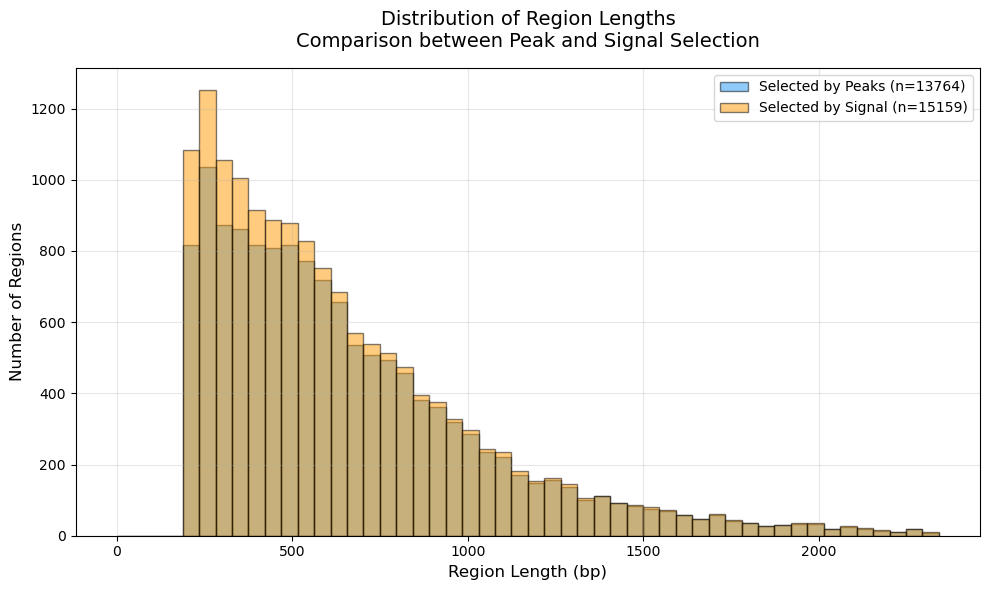

In [26]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [27]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 1.3626280650780374
chr5:33,430,439-33,435,552                        enrichment: 2.470071303657851
chrX:12,086,982-12,092,060                        enrichment: 2.1001075874425448
chrX:12,076,861-12,081,915                        enrichment: 2.276204110567986
chr17:34,118,396-34,122,981                       enrichment: 4.9366568665330295

Middle 5 outliers selected by peaks:
chr5:121,397,859-121,398,427                      enrichment: 2.2829915902190114
chr2:119,047,071-119,047,638                      enrichment: 6.1084928851998255
chr1:24,678,516-24,679,083                        enrichment: 2.225996652648174
chr12:16,810,837-16,811,404                       enrichment: 0.9050411788149422
chr2:151,740,827-151,741,394                      enrichment: 2.1598522547508234

Last 5 outliers selected by peaks:
chr6:83,572,297-83,572,498                        enrichment: 1.5636938238197151
c

In [28]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 1.3626280650780374
chr5:33,430,439-33,435,552                        enrichment: 2.470071303657851
chrX:12,086,982-12,092,060                        enrichment: 2.1001075874425448
chrX:12,076,861-12,081,915                        enrichment: 2.276204110567986
chr17:34,118,396-34,122,981                       enrichment: 4.9366568665330295

Middle 5 outliers selected by signal:
chr2:18,609,224-18,609,768                        enrichment: 1.7101397938414709
chr5:30,869,449-30,869,993                        enrichment: 1.0256028570720936
chr5:23,712,268-23,712,812                        enrichment: 1.1185259372817515
chr3:19,188,029-19,188,573                        enrichment: 1.095217284503292
chr13:112,998,484-112,999,028                     enrichment: 1.393423253626278

Last 5 outliers selected by signal:
chr11:85,310,616-85,310,817                       enrichment: 1.825399320645941


# Neu only

In [29]:
neu_only_df_by_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
15268,chrX,169994005,169994235,50.380623,0.0,inf,1.0,neu_only,neu_only,False,3,0,"79.67720000298469,34.95183007097069,36.51283889463096","0.0,0.0,0.0",273,230,CpG:,1881,2,0,9.62838;3.81024,NaN,169993992,169994265
119,chr1,37875331,37875824,32.201366,0.0,inf,1.0,neu_only,neu_only,False,3,0,"23.92086616874987,64.71876763466759,7.964462971438099","0.0,0.0,0.0",574,493,CpG:,873,2,0,3.506;7.0455,NaN,37875230,37875804
931,chr10,33624362,33624567,37.359741,0.0,inf,1.0,neu_only,neu_only,False,3,0,"24.53087866163172,54.081883270172064,33.46646151534485","0.0,0.0,0.0",1166,205,CpG:,841,3,0,3.64482;6.95828;3.58009,NaN,33623658,33624824
10867,chr5,119006032,119006424,36.939373,0.0,inf,1.0,neu_only,neu_only,False,3,0,"32.28273413902105,69.0559522052144,9.479431214443473","0.0,0.0,0.0",215,392,CpG:,1492,1,0,3.6874,NaN,119005838,119006053
5633,chr17,10318116,10318532,18.370747,0.0,inf,1.0,neu_only,neu_only,False,3,0,"13.90983703976046,20.597925882637057,20.604478397482747","0.0,0.0,0.0",673,416,CpG:,663,2,0,4.14638;2.73656,NaN,10317690,10318363


In [30]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['neu_signal', 'nsc_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = neu_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("neu only - by peaks, size:", len(neu_only_df_by_peaks))
stats_df

neu only - by peaks, size: 1059


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,1059.000000,1059.000000,972.000000,1059.000000,1059.000000,1059.000000
mean,26.711798,7.854325,21.151113,2448.706327,435.844193,0.451023
std,21.613979,8.885894,190.875698,2597.258614,304.754218,0.342059
min,1.709710,0.000000,0.224332,171.000000,201.000000,0.100000
25%,15.569333,1.993135,1.998511,889.500000,252.500000,0.100000
50%,21.319481,5.938980,3.288887,1714.000000,339.000000,0.400000
75%,30.502424,10.557296,7.365585,3011.000000,489.500000,0.700000
max,239.807669,114.978086,5579.497140,23045.000000,3089.000000,1.000000


In [31]:
stats_df = neu_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("neu only - by signal, size:", len(neu_only_df_by_signal))
stats_df

neu only - by signal, size: 89


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,89.000000,89.0,0.0,89.000000,89.000000,89.0
mean,24.446176,0.0,NaN,588.089888,496.370787,1.0
std,17.253669,0.0,NaN,458.208261,374.667501,0.0
min,1.709710,0.0,NaN,171.000000,202.000000,1.0
25%,14.209165,0.0,NaN,238.000000,260.000000,1.0
50%,19.045510,0.0,NaN,427.000000,364.000000,1.0
75%,31.312637,0.0,NaN,812.000000,539.000000,1.0
max,113.172375,0.0,NaN,2076.000000,2021.000000,1.0


In [32]:
print_across_distribution(neu_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chrX:169,994,005-169,994,235                      enrichment: inf
chr1:37,875,331-37,875,824                        enrichment: inf
chr10:33,624,362-33,624,567                       enrichment: inf
chr5:119,006,032-119,006,424                      enrichment: inf
chr17:10,318,116-10,318,532                       enrichment: inf

Middle 5 elements selected by peaks:
chrX:93,294,624-93,294,867                        enrichment: 3.701818447249825
chr16:18,588,042-18,589,039                       enrichment: 3.697207635204249
chr10:128,459,651-128,459,860                     enrichment: 3.693162673904793
chr10:81,079,911-81,080,224                       enrichment: 3.687896105201861
chr18:53,996,091-53,996,295                       enrichment: 3.684793242571865

Last 5 elements selected by peaks:
chr2:9,881,092-9,881,434                          enrichment: 0.4499882660198517
chr7:111,598,917-111,599,119                      enrichment: 0.44570610430039

In [33]:
print_across_distribution(nsc_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr9:89,066,523-89,066,900                        enrichment: 0.0
chr15:102,981,650-102,982,309                     enrichment: 0.0
chr16:94,079,639-94,079,844                       enrichment: 0.0
chrUn_GL456378:27,402-28,190                      enrichment: 0.0
chr6:136,399,201-136,399,416                      enrichment: 0.0

Middle 5 elements selected by signal:
chr4:147,275,137-147,276,116                      enrichment: 0.0
chr4:147,101,712-147,102,460                      enrichment: 0.0
chr4:146,932,301-146,932,990                      enrichment: 0.0
chr11:96,352,944-96,353,489                       enrichment: 0.0
chr2:74,679,672-74,680,076                        enrichment: 0.0

Last 5 elements selected by signal:
chr6:52,240,323-52,240,829                        enrichment: 0.0
chr6:47,739,973-47,740,697                        enrichment: 0.0
chr4:114,902,695-114,902,897                      enrichment: 0.0
chr8:20,122,209-20,122,868  

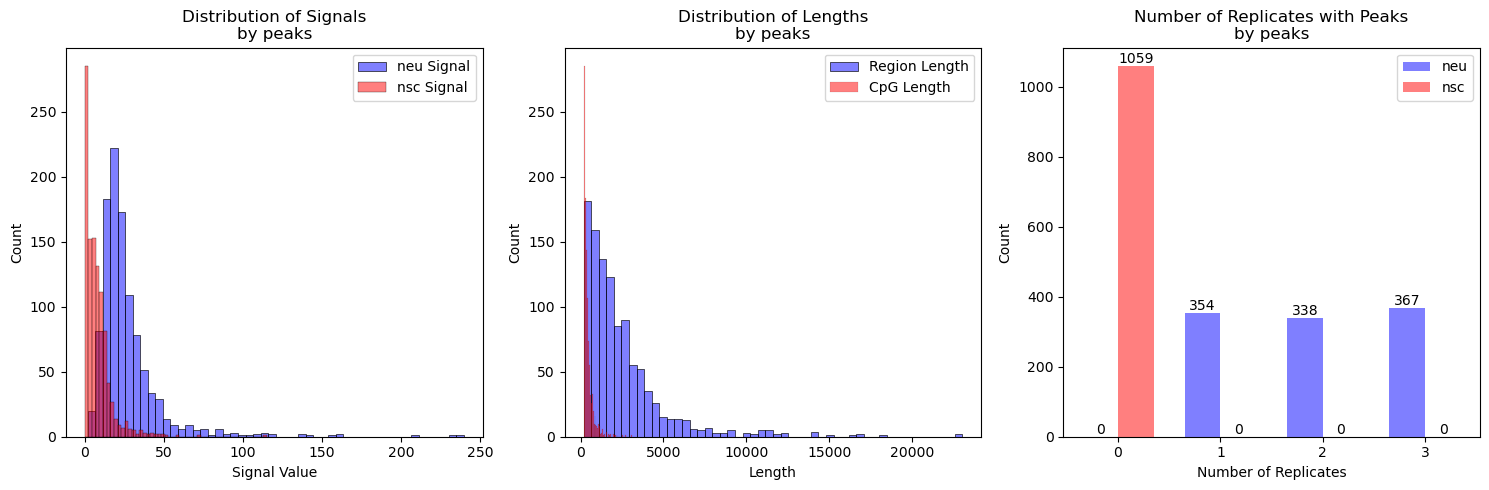

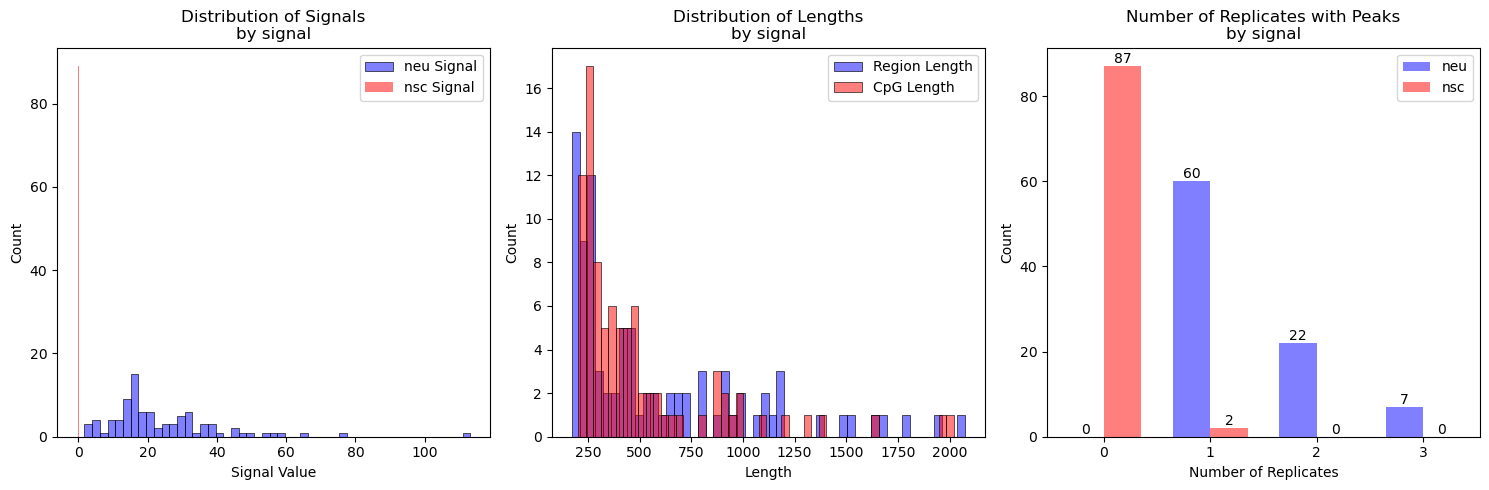

In [34]:
plot_neu_only_distributions(neu_only_df_by_peaks, title="by peaks")
plot_neu_only_distributions(neu_only_df_by_signal, title="by signal")

# NSC only

In [35]:
nsc_only_df_by_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
3624,chr13,45078550,45079118,1.985454,0.175003,11.345255,0.333333,both,nsc_only,False,2,2,"3.9339140931379446,0.0,2.0224473198640696","0.0,0.21725031241629889,0.30775874853134155",824,568,CpG:,928,0,1,NaN,5.13962,45077968,45078792
10343,chr5,26070670,26071016,0.529259,0.095098,5.565384,1.000000,both,nsc_only,False,2,1,"1.5670022225467921,0.0,0.02077509292377317","0.0,0.0,0.28529521284068204",271,346,CpG:,783,0,1,NaN,3.56574,26070760,26071031
2545,chr11,101645932,101646246,41.714594,11.038911,3.778868,0.100000,both,nsc_only,False,3,3,"27.48186670745777,65.23120435391712,32.43070951301424","9.651143717211346,4.077367560808049,19.38822286812834",1677,314,CpG:,1360,0,1,NaN,3.39742,101644455,101646132
13945,chr8,122282660,122282861,175.686906,51.435103,3.415700,0.100000,both,nsc_only,False,3,3,"157.16054399905377,227.10991276179064,142.79026003456846","41.8658998518433,61.31858665911655,51.120821652739515",4694,201,CpG:,1517,0,3,NaN,9.89181;15.9955;17.3412,122280701,122285395
10665,chr5,98181315,98181578,31.038396,10.152001,3.057367,0.200000,both,nsc_only,False,3,3,"21.863805332849193,26.46303404652795,44.78834877235945","7.45107923441155,22.429555564702945,0.5753674618033475",860,263,CpG:,1334,0,1,NaN,4.98,98180553,98181413


In [36]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['neu_signal', 'nsc_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = nsc_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("nsc only - by peaks, size:", len(nsc_only_df_by_peaks))
stats_df

nsc only - by peaks, size: 450


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,12.329764,18.280180,0.594909,1479.011111,515.917778,0.613926
std,81.687224,27.725181,0.800995,1272.450479,440.444536,0.316320
min,0.000000,0.031509,0.000000,211.000000,201.000000,0.100000
25%,2.707355,11.064899,0.185264,486.500000,256.000000,0.333333
50%,5.781428,15.469877,0.396629,1113.500000,345.500000,0.666667
75%,10.514847,21.377135,0.745862,2040.500000,603.750000,1.000000
max,1721.675176,573.001649,11.345255,9157.000000,3882.000000,1.000000


In [37]:
stats_df = nsc_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("nsc only - by signal, size:", len(nsc_only_df_by_signal))
stats_df

nsc only - by signal, size: 25


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,25.0,25.000000,25.0,25.000000,25.000000,25.0
mean,0.0,15.827158,0.0,384.200000,588.560000,1.0
std,0.0,11.160914,0.0,290.410055,390.723696,0.0
min,0.0,1.791635,0.0,211.000000,202.000000,1.0
25%,0.0,9.061779,0.0,231.000000,370.000000,1.0
50%,0.0,15.185077,0.0,245.000000,545.000000,1.0
75%,0.0,18.847696,0.0,343.000000,692.000000,1.0
max,0.0,60.097578,0.0,1294.000000,2040.000000,1.0


In [38]:
print_across_distribution(nsc_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr13:45,078,550-45,079,118                       enrichment: 11.345254503323794
chr5:26,070,670-26,071,016                        enrichment: 5.565383658776043
chr11:101,645,932-101,646,246                     enrichment: 3.7788684120274687
chr8:122,282,660-122,282,861                      enrichment: 3.415700490590154
chr5:98,181,315-98,181,578                        enrichment: 3.057367390309959

Middle 5 elements selected by peaks:
chr8:124,751,248-124,752,045                      enrichment: 0.3989170445743541
chr13:31,615,282-31,615,489                       enrichment: 0.3981285837646112
chr7:4,776,890-4,777,325                          enrichment: 0.3951301398055722
chr6:52,172,474-52,172,811                        enrichment: 0.393148445987392
chr2:165,807,680-165,807,917                      enrichment: 0.3891480610669609

Last 5 elements selected by peaks:
chr6:52,240,323-52,240,829                        enrichment: 0.0
chr6:47,739,973-4

In [39]:
print_across_distribution(nsc_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr9:89,066,523-89,066,900                        enrichment: 0.0
chr15:102,981,650-102,982,309                     enrichment: 0.0
chr16:94,079,639-94,079,844                       enrichment: 0.0
chrUn_GL456378:27,402-28,190                      enrichment: 0.0
chr6:136,399,201-136,399,416                      enrichment: 0.0

Middle 5 elements selected by signal:
chr4:147,275,137-147,276,116                      enrichment: 0.0
chr4:147,101,712-147,102,460                      enrichment: 0.0
chr4:146,932,301-146,932,990                      enrichment: 0.0
chr11:96,352,944-96,353,489                       enrichment: 0.0
chr2:74,679,672-74,680,076                        enrichment: 0.0

Last 5 elements selected by signal:
chr6:52,240,323-52,240,829                        enrichment: 0.0
chr6:47,739,973-47,740,697                        enrichment: 0.0
chr4:114,902,695-114,902,897                      enrichment: 0.0
chr8:20,122,209-20,122,868  

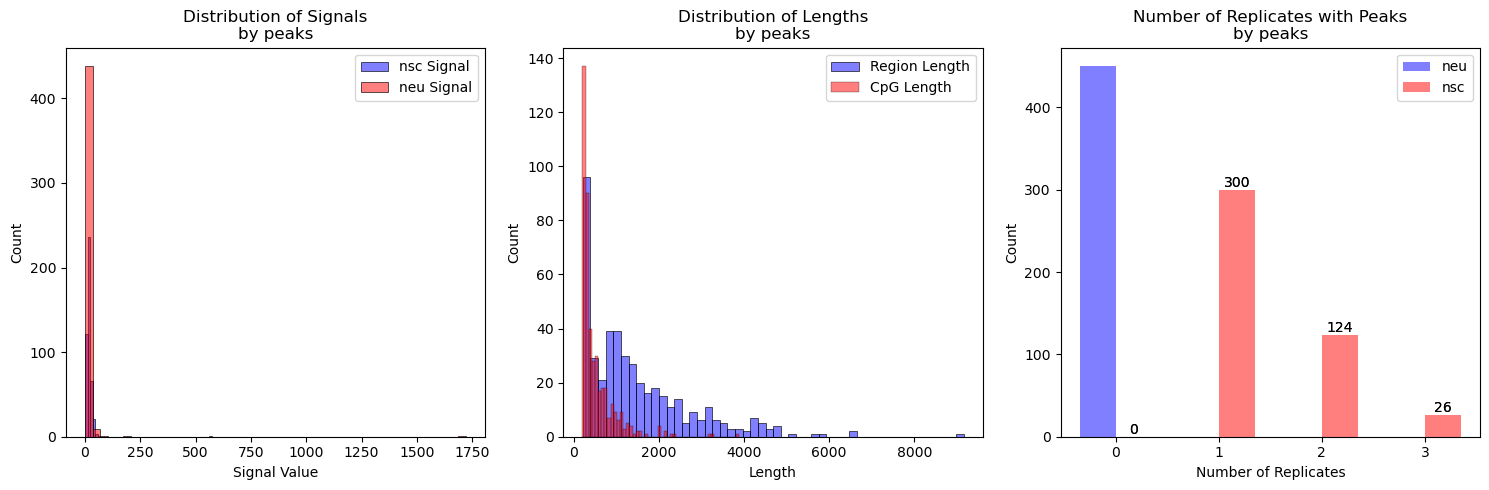

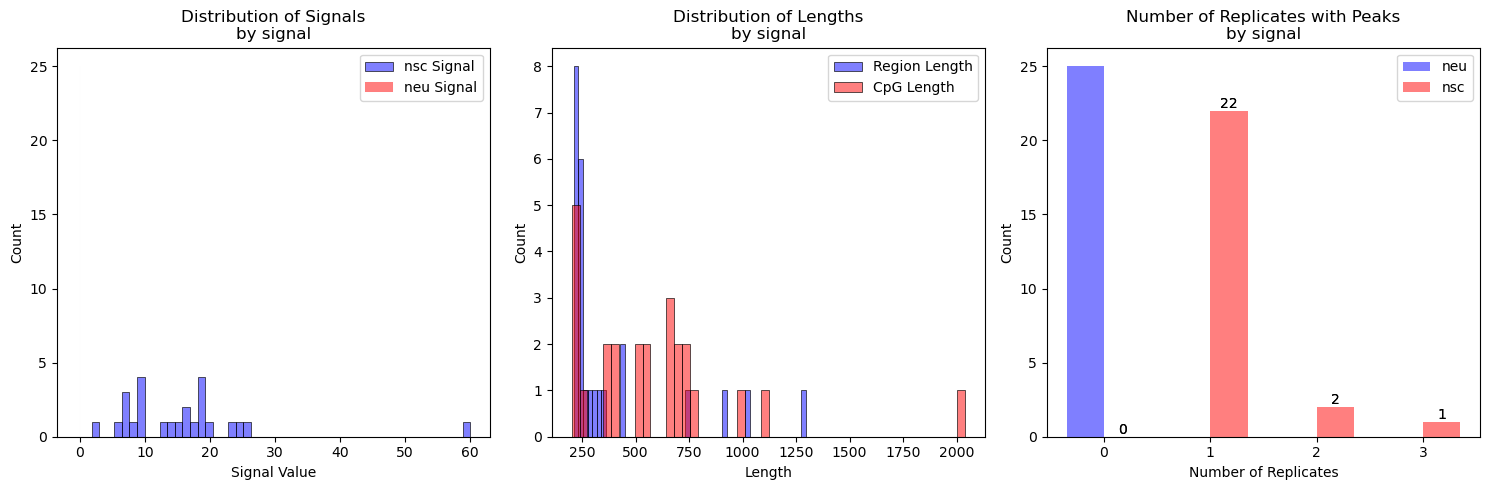

In [40]:
plot_nsc_only_distributions(nsc_only_df_by_peaks, title="by peaks")
plot_nsc_only_distributions(nsc_only_df_by_signal, title="by signal")

# Create output files

## UP in Neu

In [41]:
up_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_signal_1_5 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1.5) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()    
up_enriched_signal_2 = both_df_by_signal[(both_df_by_signal['enrichment'] > 2) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
up_enriched_peaks_1_5 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()    
up_enriched_peaks_2 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 2) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [42]:
print("up_enriched_signal_1.shape:",   up_enriched_signal_1.shape)
print("up_enriched_signal_1_5.shape:", up_enriched_signal_1_5.shape)
print("up_enriched_signal_2.shape:",   up_enriched_signal_2.shape)
print("up_enriched_peaks_1.shape:",    up_enriched_peaks_1.shape)
print("up_enriched_peaks_1_5.shape:",  up_enriched_peaks_1_5.shape)
print("up_enriched_peaks_2.shape:",    up_enriched_peaks_2.shape)

up_enriched_signal_1.shape: (12132, 24)
up_enriched_signal_1_5.shape: (8733, 24)
up_enriched_signal_2.shape: (5797, 24)
up_enriched_peaks_1.shape: (11349, 24)
up_enriched_peaks_1_5.shape: (8074, 24)
up_enriched_peaks_2.shape: (5282, 24)


## UP in NSC

In [43]:
down_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] < 1.0 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_08 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.8 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_05 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.5 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 1.0) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_08 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.8) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_05 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [44]:
print("down_enriched_signal_1.shape:",  down_enriched_signal_1.shape)
print("down_enriched_signal_08.shape:", down_enriched_signal_08.shape)
print("down_enriched_signal_05.shape:", down_enriched_signal_05.shape)
print("down_enriched_peaks_1.shape:",   down_enriched_peaks_1.shape)
print("down_enriched_peaks_08.shape:",  down_enriched_peaks_08.shape)
print("down_enriched_peaks_05.shape:",  down_enriched_peaks_05.shape)

down_enriched_signal_1.shape: (2620, 24)
down_enriched_signal_08.shape: (1523, 24)
down_enriched_signal_05.shape: (475, 24)
down_enriched_peaks_1.shape: (2234, 24)
down_enriched_peaks_08.shape: (1187, 24)
down_enriched_peaks_05.shape: (228, 24)


## Save output files

In [45]:
up_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1.csv', index=False)
up_enriched_signal_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1_5.csv', index=False)
up_enriched_signal_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_2.csv', index=False)
up_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1.csv', index=False)
up_enriched_peaks_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1_5.csv', index=False)
up_enriched_peaks_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_2.csv', index=False)

down_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_1.csv', index=False)
down_enriched_signal_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_08.csv', index=False)
down_enriched_signal_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_05.csv', index=False)
down_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_1.csv', index=False)
down_enriched_peaks_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_08.csv', index=False)
down_enriched_peaks_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_05.csv', index=False)

neu_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/neu_only_df_by_signal.csv', index=False)
nsc_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/nsc_only_df_by_signal.csv', index=False)
neu_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/neu_only_df_by_peaks.csv', index=False)
nsc_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/nsc_only_df_by_peaks.csv', index=False)